In [32]:
#import required library
#These lines import the required Python libraries for our analysis:
#pandas is a library for data manipulation and analysis, used for reading the CSV file and handling the data.
#numpy is a library for numerical computing, used for working with arrays and matrices.
#sklearn.linear_model is a module from the scikit-learn library that provides the LinearRegression model.
#sklearn.model_selection is a module from scikit-learn that provides utilities for splitting the data into training and test sets.
#matplotlib.pyplot is a module from the Matplotlib library for creating plots and visualizations.
#sklearn.metrics is a module from scikit-learn that provides various evaluation metrics for assessing the performance of the model.

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [33]:
#This line reads the data from the test_csv.csv file using the read_csv function from the pandas library and stores it in the data variable as a pandas DataFrame.

stock_price = pd.read_csv("test_csv.csv")
stock_price_2 =pd.read_csv("stockprice_two.csv")
stock_price_3 =pd.read_csv("stockprice_three.csv")
stock_price_4 =pd.read_csv("stockprice_four.csv")

In [34]:
# Convert the date column to datetime format
#This line converts the 'Dates' column in the DataFrame from string format to datetime format using the to_datetime function from pandas. 
#The format='%d/%m/%Y' argument specifies that the dates are in the 'DD/MM/YYYY' format.

stock_price['Dates'] = pd.to_datetime(stock_price['Dates'], format='%d/%m/%Y')
stock_price_2['Dates'] = pd.to_datetime(stock_price_2['Dates'], format='%d/%m/%Y')
stock_price_3['Dates'] = pd.to_datetime(stock_price_3['Dates'], format='%d/%m/%Y')
stock_price_4['Dates'] = pd.to_datetime(stock_price_4['Dates'], format='%d/%m/%Y')


In [35]:
# Set the date column as the index
#This line sets the 'Dates' column as the index of the DataFrame using the set_index method from pandas.

stock_price = stock_price.set_index('Dates')
stock_price_2 = stock_price_2.set_index('Dates')
stock_price_3 = stock_price_3.set_index('Dates')
stock_price_4 = stock_price_4.set_index('Dates')

In [36]:
# Convert the datetime index to a numerical representation (number of days since a reference date)
reference_date = stock_price.index.min()
X = (stock_price.index - reference_date).days.values.reshape(-1, 1)

reference_date_2 = stock_price_2.index.min()
X1 = (stock_price_2.index - reference_date_2).days.values.reshape(-1, 1)

reference_date_3 = stock_price_3.index.min()
X2 = (stock_price_3.index - reference_date_3).days.values.reshape(-1, 1)

reference_date_4 = stock_price_4.index.min()
X3 = (stock_price_4.index - reference_date_4).days.values.reshape(-1, 1)

In [37]:
# Target variable
#This line assigns the 'BARC LN Equity' column from the DataFrame to the y variable, which represents the target variable (stock prices). 
#The values attribute is used to convert the pandas Series to a numpy array.

y = stock_price['BARC LN Equity'].values
y1 = stock_price_2['HSBC Equity'].values
y2 = stock_price_3['JPM UN Equity'].values
y3 = stock_price_4['BAC UN EQUITY'].values

In [38]:
# Split the data into training and test sets
#This line splits the data into training and test sets using the train_test_split function from scikit-learn. 
#The X and y variables contain the feature matrix and target variable, respectively. 
#The test_size=0.2 argument specifies that 20% of the data should be used for testing, and the remaining 80% for training. 
#The random_state=42 argument ensures reproducibility by setting a fixed seed for the random number generator.
#The function returns four variables: X_train, X_test, y_train, and y_test, which contain the feature matrices and target variables for the training and test sets, respectively.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [39]:
# Create and fit the linear regression model
#These lines create an instance of the LinearRegression model from scikit-learn and fit the model to the training data (X_train, y_train) using the fit method.

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Make predictions on the training, validation, and test sets
#These lines use the fitted linear regression model to make predictions on the training and test sets using the predict method. 
#The predicted values for the training set are stored in y_train_pred, and the predicted values for the test set are stored in y_test_pred.

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [41]:
# Calculate evaluation metrics on the training set
#These lines calculate various evaluation metrics for assessing the performance of the linear regression model on both the training and test sets. The metrics calculated are:
#r2_score: R-squared score, which measures how well the model fits the data (ranges from 0 to 1, with 1 being a perfect fit).
#explained_variance_score: Explained variance score, which represents the proportion of variance in the target variable that is explained by the model.
#mean_absolute_percentage_error: Mean Absolute Percentage Error (MAPE), which measures the average absolute percentage difference between the predicted and actual values.
#mean_squared_error: Mean Squared Error (MSE), which measures the average squared difference between the predicted and actual values.
#np.sqrt(mse): Root Mean Squared Error (RMSE), which is the square root of the MSE and provides a measure of the typical magnitude of the prediction errors.
#mean_absolute_error: Mean Absolute Error (MAE), which measures the average absolute difference between the predicted and actual values.
#Each metric is calculated separately for the training and test sets using the corresponding functions from the sklearn.metrics module.



r2_train = r2_score(y_train, y_train_pred)
explained_variance_train = explained_variance_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)


# Calculate evaluation metrics on the validation set
r2_val = r2_score(y_val, y_val_pred)
explained_variance_val = explained_variance_score(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mse_val ** 0.5
mae_val = mean_absolute_error(y_val, y_val_pred)


# Calculate evaluation metrics on the test set
r2_test = r2_score(y_test, y_test_pred)
explained_variance_test = explained_variance_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)


In [42]:
#These lines print the calculated evaluation metrics for both the training and test sets. The f-strings are used to format the output with the metric names and values.



print("Training Set Metrics:")
print(f"\nR-squared: {r2_train:.2f}")
print(f"Explained Variation: {explained_variance_train:.2f}")
print(f"MAPE: {mape_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")


print("\nValidation Set Metrics:")
print(f"\nR-squared: {r2_val:.2f}")
print(f"Explained Variation: {explained_variance_val:.2f}")
print(f"MAPE: {mape_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"MAE: {mae_val:.2f}")


print("\nTest Set Metrics:")

print(f"\nR-squared: {r2_test:.2f}")
print(f"Explained Variation: {explained_variance_test:.2f}")
print(f"MAPE: {mape_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")

Training Set Metrics:

R-squared: 0.06
Explained Variation: 0.06
MAPE: 0.15
MSE: 0.07
RMSE: 0.26
MAE: 0.22

Validation Set Metrics:

R-squared: 0.11
Explained Variation: 0.11
MAPE: 0.17
MSE: 0.08
RMSE: 0.28
MAE: 0.24

Test Set Metrics:

R-squared: 0.09
Explained Variation: 0.09
MAPE: 0.17
MSE: 0.08
RMSE: 0.28
MAE: 0.23


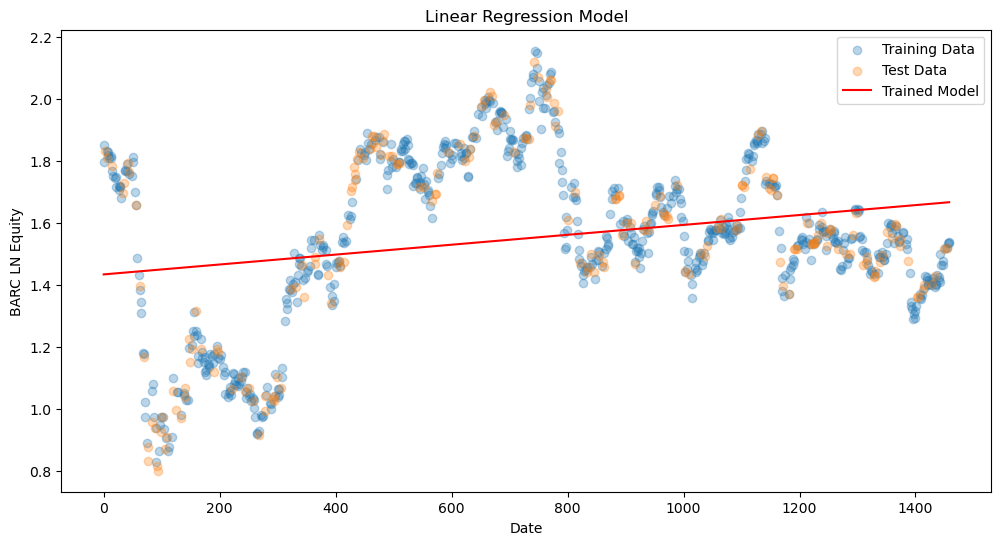

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label='Training Data', alpha=0.3)
plt.scatter(X_test, y_test, label='Test Data', alpha=0.3)
plt.plot(X, model.predict(X), 'r', label='Trained Model')
plt.xlabel('Date')
plt.ylabel('BARC LN Equity')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [44]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, random_state=42)

In [45]:
model_1 = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [46]:
y1_train_pred = model.predict(X1_train)
y1_val_pred = model.predict(X1_val)
y1_test_pred = model.predict(X1_test)


In [47]:
HSBC_r2_train = r2_score(y1_train, y1_train_pred)
HSBC_explained_variance_train = explained_variance_score(y1_train, y1_train_pred)
HSBC_mape_train = mean_absolute_percentage_error(y1_train, y1_train_pred)
HSBC_mse_train = mean_squared_error(y1_train, y1_train_pred)
HSBC_rmse_train = mse_train ** 0.5
HSBC_mae_train = mean_absolute_error(y1_train, y1_train_pred)


# Calculate evaluation metrics on the validation set
HSBC_r2_val = r2_score(y1_val, y1_val_pred)
HSBC_explained_variance_val = explained_variance_score(y1_val, y1_val_pred)
HSBC_mape_val = mean_absolute_percentage_error(y1_val, y1_val_pred)
HSBC_mse_val = mean_squared_error(y1_val, y1_val_pred)
HSBC_rmse_val = mse_val ** 0.5
HSBC_mae_val = mean_absolute_error(y1_val, y1_val_pred)


# Calculate evaluation metrics on the test set
HSBC_r2_test = r2_score(y1_test, y1_test_pred)
HSBC_explained_variance_test = explained_variance_score(y1_test, y1_test_pred)
HSBC_mape_test = mean_absolute_percentage_error(y1_test, y1_test_pred)
HSBC_mse_test = mean_squared_error(y1_test, y1_test_pred)
HSBC_rmse_test = mse_test ** 0.5
HSBC_mae_test = mean_absolute_error(y1_test, y1_test_pred)

In [48]:
print("Training Set Metrics:")
print(f"\nHSBC R-squared: {HSBC_r2_train:.2f}")
print(f"HSBCExplained Variation: {HSBC_explained_variance_train:.2f}")
print(f"HSBC MAPE: {HSBC_mape_train:.2f}")
print(f"HSBC MSE: {HSBC_mse_train:.2f}")
print(f"HSBC RMSE: {HSBC_rmse_train:.2f}")
print(f"HSBC MAE: {HSBC_mae_train:.2f}")


print("\nHSBC Validation Set Metrics:")
print(f"\nR-squared: {HSBC_r2_val:.2f}")
print(f"Explained Variation: {HSBC_explained_variance_val:.2f}")
print(f"MAPE: {HSBC_mape_val:.2f}")
print(f"MSE: {HSBC_mse_val:.2f}")
print(f"RMSE: {HSBC_rmse_val:.2f}")
print(f"MAE: {HSBC_mae_val:.2f}")


print("\nHSBC Test Set Metrics:")

print(f"\nR-squared: {HSBC_r2_test:.2f}")
print(f"Explained Variation: {HSBC_explained_variance_test:.2f}")
print(f"MAPE: {HSBC_mape_test:.2f}")
print(f"MSE: {HSBC_mse_test:.2f}")
print(f"RMSE: {HSBC_rmse_test:.2f}")
print(f"MAE: {HSBC_mae_test:.2f}")

Training Set Metrics:

HSBC R-squared: 0.55
HSBCExplained Variation: 0.55
HSBC MAPE: 0.10
HSBC MSE: 0.39
HSBC RMSE: 0.26
HSBC MAE: 0.44

HSBC Validation Set Metrics:

R-squared: 0.54
Explained Variation: 0.55
MAPE: 0.10
MSE: 0.36
RMSE: 0.28
MAE: 0.44

HSBC Test Set Metrics:

R-squared: 0.56
Explained Variation: 0.56
MAPE: 0.09
MSE: 0.38
RMSE: 0.28
MAE: 0.43


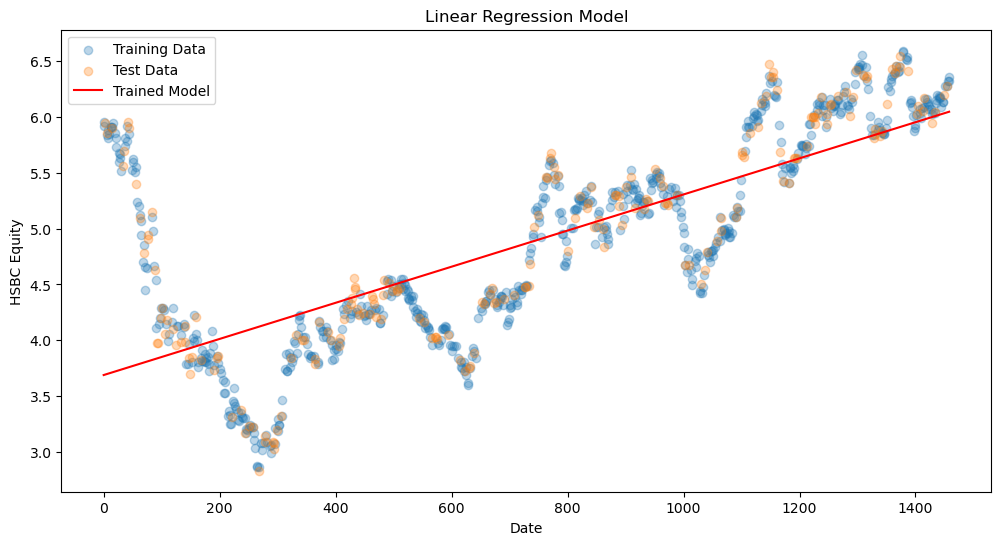

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(X1_train, y1_train, label='Training Data', alpha=0.3)
plt.scatter(X1_test, y1_test, label='Test Data', alpha=0.3)
plt.plot(X1, model.predict(X1), 'r', label='Trained Model')
plt.xlabel('Date')
plt.ylabel('HSBC Equity')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.2, random_state=42)

In [51]:
model_2 = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [52]:
y2_train_pred = model.predict(X2_train)
y2_val_pred = model.predict(X2_val)
y2_test_pred = model.predict(X2_test)

In [53]:
JPM_UN_r2_train = r2_score(y2_train, y2_train_pred)
JPM_UN_explained_variance_train = explained_variance_score(y2_train, y2_train_pred)
JPM_UN_mape_train = mean_absolute_percentage_error(y2_train, y2_train_pred)
JPM_UN_mse_train = mean_squared_error(y2_train, y2_train_pred)
JPM_UN_rmse_train = mse_train ** 0.5
JPM_UN_mae_train = mean_absolute_error(y2_train, y2_train_pred)


# Calculate evaluation metrics on the validation set
JPM_UN_r2_val = r2_score(y2_val, y2_val_pred)
JPM_UN_explained_variance_val = explained_variance_score(y2_val, y2_val_pred)
JPM_UN_mape_val = mean_absolute_percentage_error(y2_val, y2_val_pred)
JPM_UN_mse_val = mean_squared_error(y2_val, y2_val_pred)
JPM_UN_rmse_val = mse_val ** 0.5
JPM_UN_mae_val = mean_absolute_error(y2_val, y2_val_pred)


# Calculate evaluation metrics on the test set
JPM_UN_r2_test = r2_score(y2_test, y2_test_pred)
JPM_UN_explained_variance_test = explained_variance_score(y2_test, y2_test_pred)
JPM_UN_mape_test = mean_absolute_percentage_error(y2_test, y2_test_pred)
JPM_UN_mse_test = mean_squared_error(y2_test, y2_test_pred)
JPM_UN_rmse_test = mse_test ** 0.5
JPM_UN_mae_test = mean_absolute_error(y2_test, y2_test_pred)

In [54]:
print("Training Set Metrics:")
print(f"\nJPM_UN R-squared: {JPM_UN_r2_train:.2f}")
print(f"JPM_UNExplained Variation: {JPM_UN_explained_variance_train:.2f}")
print(f"JPM_UN MAPE: {JPM_UN_mape_train:.2f}")
print(f"JPM_UN MSE: {JPM_UN_mse_train:.2f}")
print(f"JPM_UN RMSE: {JPM_UN_rmse_train:.2f}")
print(f"JPM_UN MAE: {JPM_UN_mae_train:.2f}")


print("\nJPM_UN Validation Set Metrics:")
print(f"\nR-squared: {JPM_UN_r2_val:.2f}")
print(f"Explained Variation: {JPM_UN_explained_variance_val:.2f}")
print(f"MAPE: {JPM_UN_mape_val:.2f}")
print(f"MSE: {JPM_UN_mse_val:.2f}")
print(f"RMSE: {JPM_UN_rmse_val:.2f}")
print(f"MAE: {JPM_UN_mae_val:.2f}")


print("\nJPM_UN Test Set Metrics:")

print(f"\nR-squared: {JPM_UN_r2_test:.2f}")
print(f"Explained Variation: {JPM_UN_explained_variance_test:.2f}")
print(f"MAPE: {JPM_UN_mape_test:.2f}")
print(f"MSE: {JPM_UN_mse_test:.2f}")
print(f"RMSE: {JPM_UN_rmse_test:.2f}")
print(f"MAE: {JPM_UN_mae_test:.2f}")

Training Set Metrics:

JPM_UN R-squared: 0.43
JPM_UNExplained Variation: 0.43
JPM_UN MAPE: 0.10
JPM_UN MSE: 130.14
JPM_UN RMSE: 0.26
JPM_UN MAE: 9.64

JPM_UN Validation Set Metrics:

R-squared: 0.40
Explained Variation: 0.40
MAPE: 0.11
MSE: 153.40
RMSE: 0.28
MAE: 10.65

JPM_UN Test Set Metrics:

R-squared: 0.44
Explained Variation: 0.44
MAPE: 0.10
MSE: 130.50
RMSE: 0.28
MAE: 9.72


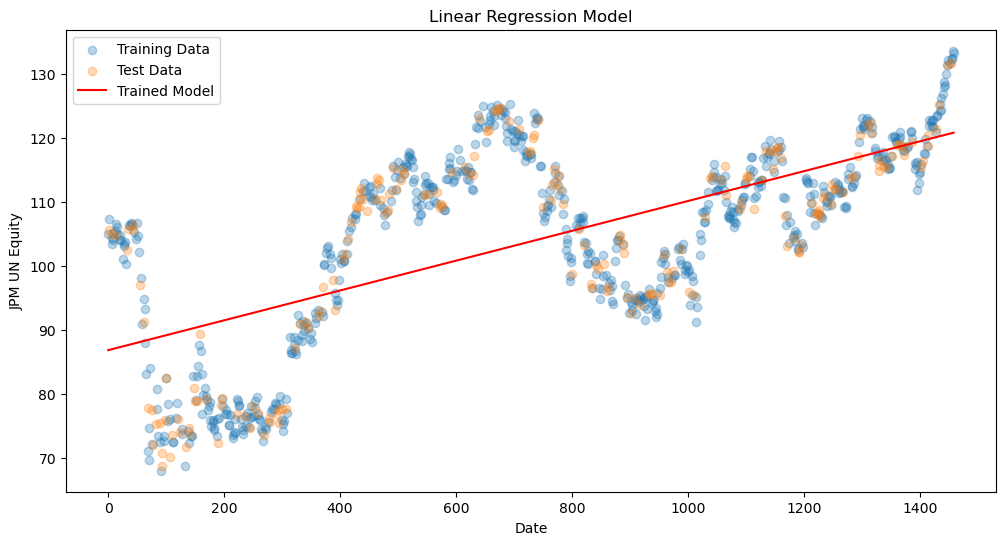

In [55]:
plt.figure(figsize=(12, 6))
plt.scatter(X2_train, y2_train, label='Training Data', alpha=0.3)
plt.scatter(X2_test, y2_test, label='Test Data', alpha=0.3)
plt.plot(X2, model.predict(X2), 'r', label='Trained Model')
plt.xlabel('Date')
plt.ylabel('JPM UN Equity')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [56]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.2, random_state=42)

In [57]:
model_3 = LinearRegression()
model.fit(X3_train, y3_train)

LinearRegression()

In [58]:

y3_train_pred = model.predict(X3_train)
y3_val_pred = model.predict(X3_val)
y3_test_pred = model.predict(X3_test)

In [62]:
BAC_UN_r2_train = r2_score(y3_train, y3_train_pred)
BAC_UN_explained_variance_train = explained_variance_score(y3_train, y3_train_pred)
BAC_UN_mape_train = mean_absolute_percentage_error(y3_train, y3_train_pred)
BAC_UN_mse_train = mean_squared_error(y3_train, y3_train_pred)
BAC_UN_rmse_train = mse_train ** 0.5
BAC_UN_mae_train = mean_absolute_error(y3_train, y3_train_pred)


# Calculate evaluation metrics on the validation set
BAC_UN_r2_val = r2_score(y3_val, y3_val_pred)
BAC_UN_explained_variance_val = explained_variance_score(y3_val, y3_val_pred)
BAC_UN_mape_val = mean_absolute_percentage_error(y3_val, y3_val_pred)
BAC_UN_mse_val = mean_squared_error(y3_val, y3_val_pred)
BAC_UN_rmse_val = mse_val ** 0.5
BAC_UN_mae_val = mean_absolute_error(y3_val, y3_val_pred)


# Calculate evaluation metrics on the test set
BAC_UN_r2_test = r2_score(y3_test, y3_test_pred)
BAC_UN_explained_variance_test = explained_variance_score(y3_test, y3_test_pred)
BAC_UN_mape_test = mean_absolute_percentage_error(y3_test, y3_test_pred)
BAC_UN_mse_test = mean_squared_error(y3_test, y3_test_pred)
BAC_UN_rmse_test = mse_test ** 0.5
BAC_UN_mae_test = mean_absolute_error(y3_test, y3_test_pred)

In [63]:
print("Training Set Metrics:")
print(f"\nBAC_UN R-squared: {BAC_UN_r2_train:.2f}")
print(f"BAC_UNUNExplained Variation: {BAC_UN_explained_variance_train:.2f}")
print(f"BAC_UN MAPE: {BAC_UN_mape_train:.2f}")
print(f"JBAC_UN MSE: {BAC_UN_mse_train:.2f}")
print(f"BAC_UN RMSE: {BAC_UN_rmse_train:.2f}")
print(f"BAC_UN MAE: {BAC_UN_mae_train:.2f}")


print("\nBAC_UN Validation Set Metrics:")
print(f"\nR-squared: {BAC_UN_r2_val:.2f}")
print(f"Explained Variation: {BAC_UN_explained_variance_val:.2f}")
print(f"MAPE: {BAC_UN_mape_val:.2f}")
print(f"MSE: {BAC_UN_mse_val:.2f}")
print(f"RMSE: {BAC_UN_rmse_val:.2f}")
print(f"MAE: {BAC_UN_mae_val:.2f}")


print("\nBAC_UN Test Set Metrics:")

print(f"\nR-squared: {BAC_UN_r2_test:.2f}")
print(f"Explained Variation: {BAC_UN_explained_variance_test:.2f}")
print(f"MAPE: {BAC_UN_mape_test:.2f}")
print(f"MSE: {BAC_UN_mse_test:.2f}")
print(f"RMSE: {BAC_UN_rmse_test:.2f}")
print(f"MAE: {BAC_UN_mae_test:.2f}")

Training Set Metrics:

BAC_UN R-squared: 0.05
BAC_UNUNExplained Variation: 0.05
BAC_UN MAPE: 0.16
JBAC_UN MSE: 21.41
BAC_UN RMSE: 0.26
BAC_UN MAE: 4.05

BAC_UN Validation Set Metrics:

R-squared: 0.10
Explained Variation: 0.11
MAPE: 0.17
MSE: 22.23
RMSE: 0.28
MAE: 4.17

BAC_UN Test Set Metrics:

R-squared: 0.06
Explained Variation: 0.06
MAPE: 0.17
MSE: 22.60
RMSE: 0.28
MAE: 4.17


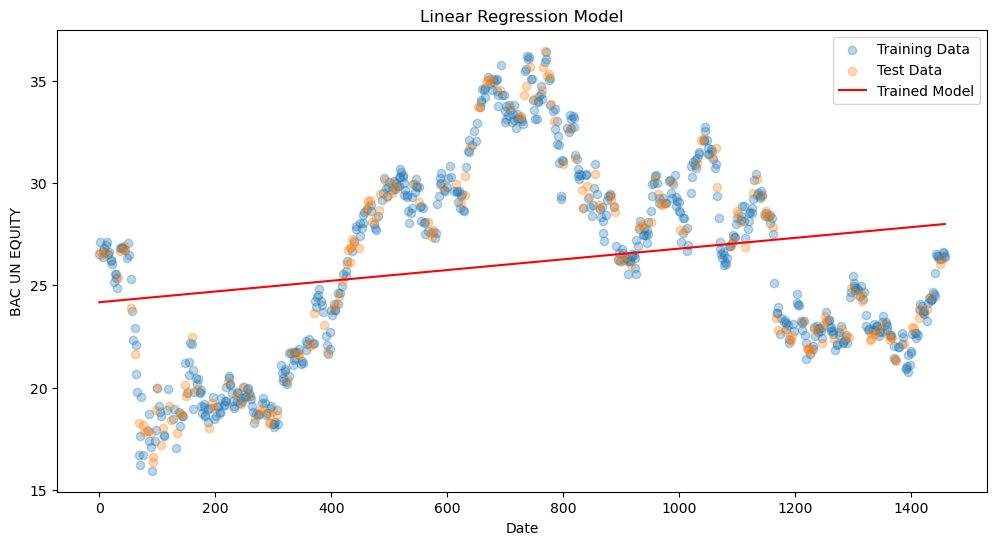

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(X3_train, y3_train, label='Training Data', alpha=0.3)
plt.scatter(X3_test, y3_test, label='Test Data', alpha=0.3)
plt.plot(X3, model.predict(X3), 'r', label='Trained Model')
plt.xlabel('Date')
plt.ylabel('BAC UN EQUITY')
plt.title('Linear Regression Model')
plt.legend()
plt.show()